In [2]:
import os
import matplotlib.pyplot as plt
import numpy as np
from keras import models
from keras import layers
from keras import optimizers
from keras.applications import VGG16
from keras.preprocessing.image import ImageDataGenerator



Using TensorFlow backend.


In [3]:
import os
try:
	os.chdir(os.path.join(os.getcwd(), 'chapter5'))
	print(os.getcwd())
except:
	pass

In [4]:
from keras.models import load_model

In [5]:
model = load_model('cats_and_dogs_small_2.h5')
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_______________________________________

In [7]:
from keras.preprocessing import image
import numpy as np

img_path = 'cat.jpg'
img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

print(img_tensor.shape)



(1, 150, 150, 3)


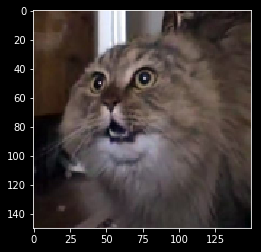

In [8]:
import matplotlib.pyplot as plt

plt.imshow(img_tensor[0])
plt.show()

In [9]:
from keras import models

layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(img_tensor)

In [12]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)


(1, 148, 148, 32)


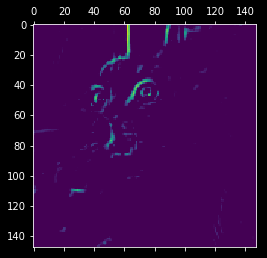

In [14]:
plt.matshow(first_layer_activation[0, :, :, 7], cmap='viridis')


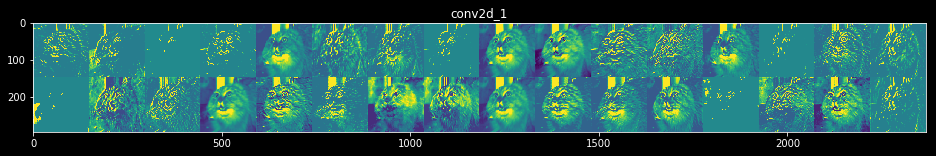

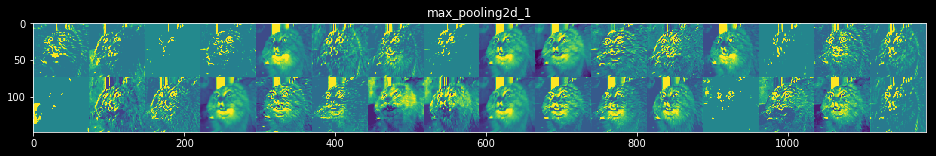

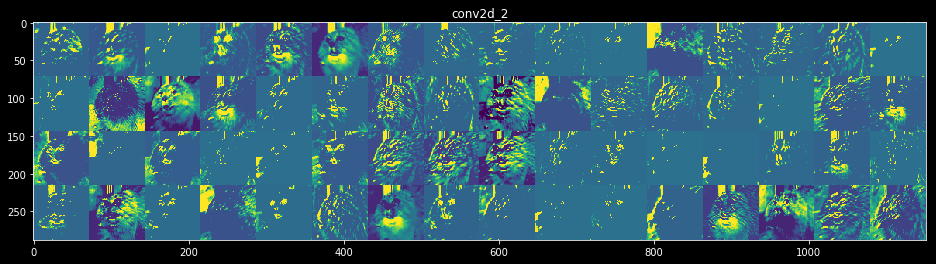

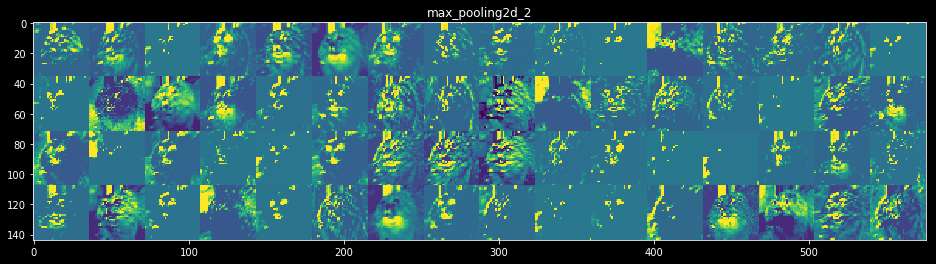

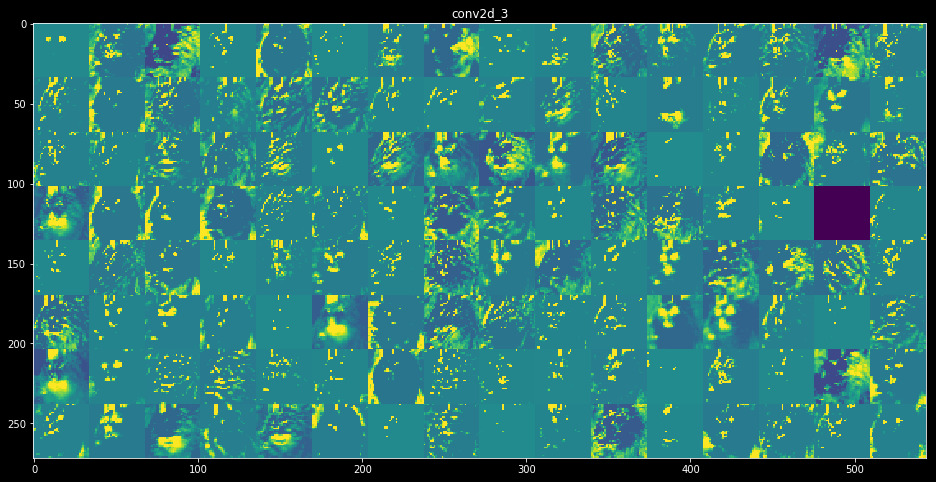

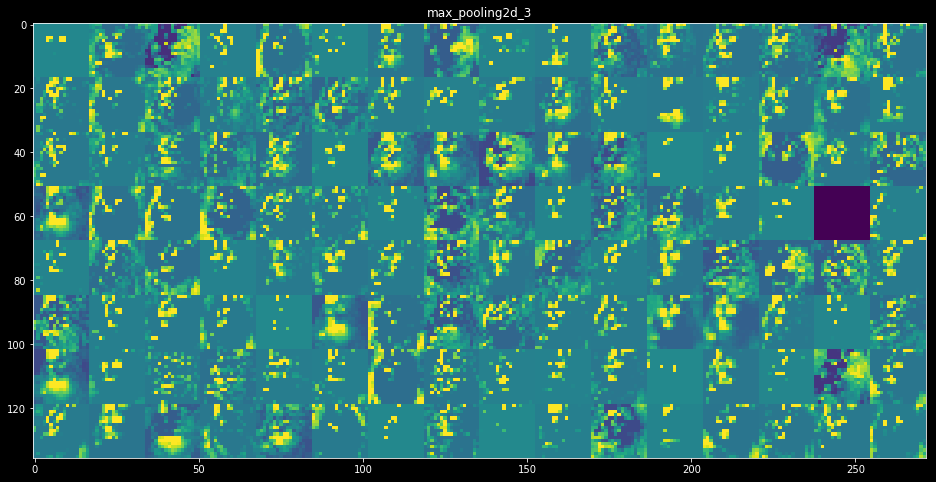

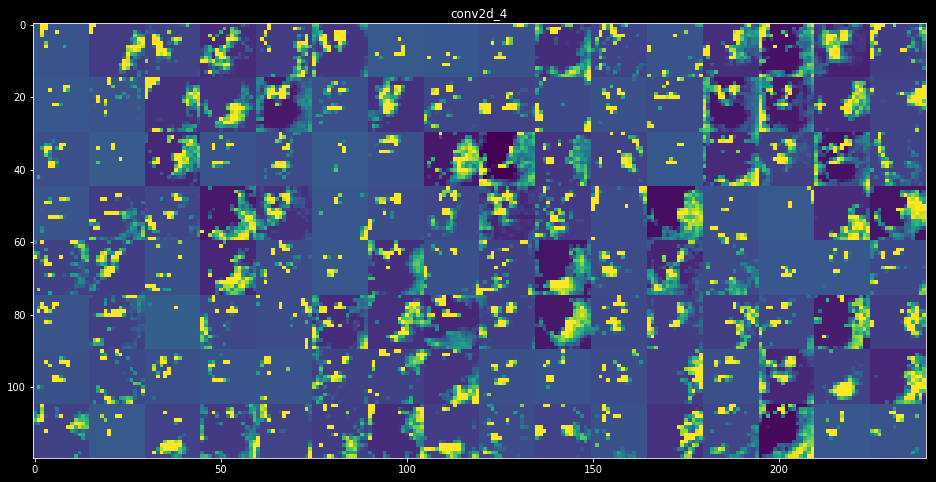

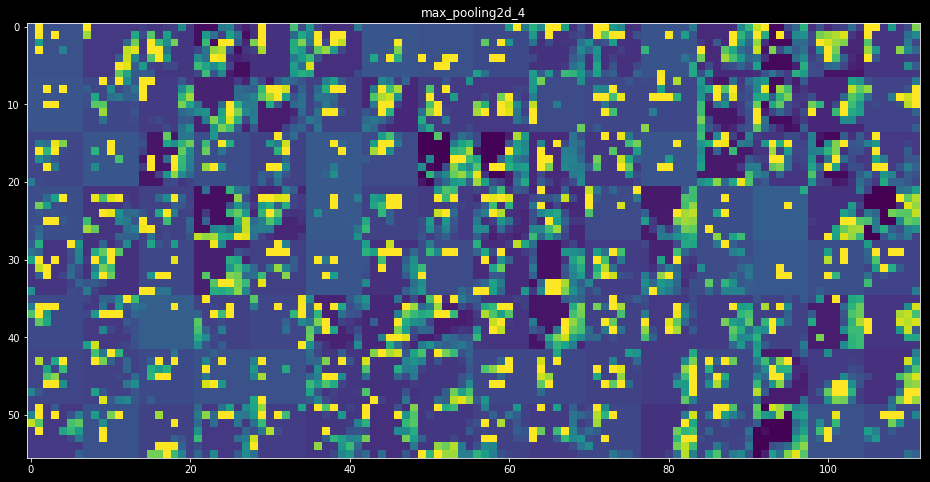

In [16]:
layer_name = []
for layer in model.layers[:8]:
    layer_name.append(layer.name)

images_per_row = 16

for layer_name, layer_activation in zip(layer_name, activations):
    n_features = layer_activation.shape[-1]
    size = layer_activation.shape[1]

    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0, :, :, col * images_per_row + row]
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size:(col + 1) * size,
                         row * size:(row + 1) * size] = channel_image

    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))

    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
